
# Project: Investigate a Dataset - [Dataset-TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

To complete this projet we're using TMDb movie dataset, This data set contains information about 10,000 movies collected from The Movie Database (TMDb)

### Question(s) for Analysis
>1- Which movies has highest and lowest revenue ?<br>
>2- Which movies has highest and lowest profit ?<br>
>3- which movies has largest and lowest budget ?<br>
>4- What is the average Runtime of all movies ?<br>
>5- The most profitable movie of each year ?<br>
>6- The average budget for profitable movies ( more than the mean profit) ?<br>
>7- The most frequent actor in a leading role of all movies ? <br>
>8- The most frequent actor in a leading role in a profitable movie ( more than the mean profit) ?<br>
>9- Which genres are more profitable ?<br>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> we noticed that we have some **null-values** around our data so we're going to deal with the null-values based on which column is missing data.<br>
Also we're going to check if we have some **dublicates** cause we don't want get confusin data. <br>
**but first thing first**, there are some columns that contains data I don't think it would useful for our analysing such as ("id","homepage",etc.) so let's get rid of those. 
 

> #### Removing unuseful columns from the dataset

In [5]:
# first we will create a list with all the columns we don't need to drop it from the dataset
drop_col = ['id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'budget_adj', 'revenue_adj']

df = df.drop(drop_col, axis= 1)
df.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015


In [6]:
#reordering the columns as needed
col = df.columns.tolist()
col

['budget',
 'revenue',
 'original_title',
 'cast',
 'director',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_average',
 'release_year']

In [7]:
col = ['original_title','cast','director','budget','revenue','release_date','release_year','genres','runtime','production_companies','vote_average',]
df =df[col]
df.head(2)


,original_title,cast,director,budget,revenue,release_date,release_year,genres,runtime,production_companies,vote_average
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,150000000,1513528810,6/9/15,2015,Action|Adventure|Science Fiction|Thriller,124,Universal Studios|Amblin Entertainment|Legenda...,6.5
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,150000000,378436354,5/13/15,2015,Action|Adventure|Science Fiction|Thriller,120,Village Roadshow Pictures|Kennedy Miller Produ...,7.1


> #### Removing duplicates

In [8]:
#checking for duplicates
df.duplicated().sum()

1

In [9]:
df.shape

(10866, 11)

In [10]:
#looks like we have only one duplicate row so we're going to drop it
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.shape

(10865, 11)

> #### Removing zero values from budget & revenue columns <br>

In [12]:
#we could find that we have values in our budget and revenue columns with 0 values which can't be true
zero_value = ['budget', 'revenue']
df[zero_value] = df[zero_value].replace(0,np.NAN)
df.dropna(subset = zero_value, inplace = True)

> #### Checking which datatypes in our dataset needed to be changed

In [13]:
df.dtypes

original_title           object
cast                     object
director                 object
budget                  float64
revenue                 float64
release_date             object
release_year              int64
genres                   object
runtime                   int64
production_companies     object
vote_average            float64
dtype: object

In [14]:
# we first need to change 'release_date' to date format
df.release_date = pd.to_datetime(df.release_date)

# then we need to change 'vote_average' to float
df.vote_average = df.vote_average.astype(float)

In [15]:
df.dtypes

original_title                  object
cast                            object
director                        object
budget                         float64
revenue                        float64
release_date            datetime64[ns]
release_year                     int64
genres                          object
runtime                          int64
production_companies            object
vote_average                   float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> Now after finishing cleaning our data we can use our dataset to answer some of the questions


> ### 1- Which movies has highest and lowest revenue ?

In [16]:
# first we will create a new column representing the profit of each movie "revenue - budget"
df.insert(5, 'profit', df['revenue'] - df['budget'])

In [17]:
df.head(2)

,original_title,cast,director,budget,revenue,profit,release_date,release_year,genres,runtime,production_companies,vote_average
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,150000000.0,1.513529e+09,1.363529e+09,2015-06-09,2015,Action|Adventure|Science Fiction|Thriller,124,Universal Studios|Amblin Entertainment|Legenda...,6.5
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,150000000.0,3.784364e+08,2.284364e+08,2015-05-13,2015,Action|Adventure|Science Fiction|Thriller,120,Village Roadshow Pictures|Kennedy Miller Produ...,7.1


In [18]:
# we will create a function to calculate the highest and lowest value of each argument
def calculate(col_name) :
    high = df[col_name].idxmax()
    high_details = pd.DataFrame(df.loc[high])
    high_details.rename(columns = {high : "high"}, inplace = True)
    high_details = high_details.T
    low = df[col_name].idxmin()
    low_details = pd.DataFrame(df.loc[low])
    low_details.rename(columns = {low : "low"}, inplace = True)
    low_details =low_details.T
    result = pd.concat([high_details,low_details], axis =0)
    return result

In [19]:
# we use the "calculate" function to get the movie with the highest and lowest revenue
revenue_cal = calculate('revenue')
revenue_cal

,original_title,cast,director,budget,revenue,profit,release_date,release_year,genres,runtime,production_companies,vote_average
high,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,2.37e+08,2.78151e+09,2.54451e+09,2009-12-10,2009,Action|Adventure|Fantasy|Science Fiction,162,Ingenious Film Partners|Twentieth Century Fox ...,7.1
low,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,6e+06,2,-6e+06,2003-11-14,2003,Drama|History,94,Lions Gate Films|Cruise/Wagner Productions|Bau...,6.4


In [20]:
high_title = revenue_cal['original_title']['high']
low_title = revenue_cal['original_title']['low']
print(f'The movie with the highest revenues is "{high_title}"\nAnd the movie with the lowest revenue is "{low_title}"')

The movie with the highest revenues is "Avatar"
And the movie with the lowest revenue is "Shattered Glass"


> ### 2- Which movies has highest and lowest profit ?<br>

In [21]:
# we will do the same as we did for revenue
profit_cal = calculate('profit')
profit_cal

,original_title,cast,director,budget,revenue,profit,release_date,release_year,genres,runtime,production_companies,vote_average
high,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,2.37e+08,2.78151e+09,2.54451e+09,2009-12-10,2009,Action|Adventure|Fantasy|Science Fiction,162,Ingenious Film Partners|Twentieth Century Fox ...,7.1
low,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,4.25e+08,1.10876e+07,-4.13912e+08,2010-12-02,2010,Adventure|Fantasy|Action|Western|Thriller,100,Boram Entertainment Inc.,6.4


In [22]:
high_title = profit_cal['original_title']['high']
low_title = profit_cal['original_title']['low']
print(f'The movie with the highest profit is "{high_title}"\nAnd the movie with the lowest profit is "{low_title}"')

The movie with the highest profit is "Avatar"
And the movie with the lowest profit is "The Warrior's Way"


> ### 3- which movies has largest and lowest budget ?<br>


In [23]:
# the same for budget 
budget_cal = calculate('budget')
budget_cal

,original_title,cast,director,budget,revenue,profit,release_date,release_year,genres,runtime,production_companies,vote_average
high,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,4.25e+08,1.10876e+07,-4.13912e+08,2010-12-02,2010,Adventure|Fantasy|Action|Western|Thriller,100,Boram Entertainment Inc.,6.4
low,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,1,100,99,1999-04-23,1999,Comedy|Romance,95,Alcon Entertainment|Dinamo Entertainment,4.8


In [24]:
high_title = budget_cal['original_title']['high']
low_title = budget_cal['original_title']['low']
print(f'The movie with the highest budget is "{high_title}"\nAnd the movie with the lowest budget is "{low_title}"')

The movie with the highest budget is "The Warrior's Way"
And the movie with the lowest budget is "Lost & Found"


> ### 4- What is the average Runtime of all movies ?<br>

In [25]:
avg_runtime = df.runtime.mean()
print(f'The average runtime of all movies is "{int(avg_runtime.round())}" minute')

The average runtime of all movies is "109" minute


> ### 5- The most profitable movie of each year ?<br>

In [26]:
# we will create a function that takes 2 argument "release year and profit columns"
# it should return a DataFrame with all the details of the most profitable movie of each year
def year_profit(col_year, col_profit):
    index = df.groupby(col_year)[col_profit].idxmax().tolist()
    df_list = []
    num = 0
    for idx in index :
        new_df = pd.DataFrame(df.loc[index[num]])
        new_df = new_df.T
        df_list.append(new_df)
        num += 1
    result = pd.concat(df_list, axis =0)
    result = result.set_index(col_year)
    return result

In [27]:
year_movie = year_profit('release_year', 'profit')
year_movie

,original_title,cast,director,budget,revenue,profit,release_date,genres,runtime,production_companies,vote_average
release_year,,,,,,,,,,,
1960,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,1.2e+07,6e+07,4.8e+07,2060-10-06,Action|Drama|History,197,Bryna Productions,6.9
1961,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,4e+06,2.1588e+08,2.1188e+08,2061-01-25,Adventure|Animation|Comedy|Family,79,Walt Disney Productions,6.6
1962,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,1.1e+06,5.96e+07,5.85e+07,2062-10-04,Adventure|Action|Thriller,110,Eon Productions|Metro-Goldwyn-Mayer (MGM),6.7
1963,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,2.5e+06,7.88988e+07,7.63988e+07,2063-10-11,Action|Thriller|Adventure,115,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,6.7
1964,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Guy Hamilton,3.5e+06,1.249e+08,1.214e+08,2064-09-17,Adventure|Action|Thriller,110,Eon Productions|Metro-Goldwyn-Mayer (MGM),7
1965,The Sound of Music,Julie Andrews|Christopher Plummer|Eleanor Park...,Robert Wise,8.2e+06,1.63214e+08,1.55014e+08,2065-03-02,Drama|Family|Music|Romance,174,Robert Wise Productions|Argyle Enterprises,7.2
1966,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,7.5e+06,3.37367e+07,2.62367e+07,2066-06-21,Drama,131,Chenault Productions,7.5
1967,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,Wolfgang Reitherman,4e+06,2.05844e+08,2.01844e+08,2067-10-18,Family|Animation|Adventure,78,Walt Disney Pictures,7
1968,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,1.2e+07,5.67154e+07,4.47154e+07,2068-04-05,Science Fiction|Mystery|Adventure,149,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,7.7


> ### 6- The average budget for profitable movies ( more than the mean profit) ?

In [28]:
# first we will get the movies that have a profit above the average profit
# then we will get the average bugdet for those profitable movies
mean_profit = df.profit.mean()
df_profitable = df[df['profit'] > mean_profit]
avg_budget = df_profitable.budget.mean().round(2)
print(f'The average bugdet for profitable movies is "{avg_budget}"')

The average bugdet for profitable movies is "66525485.25"


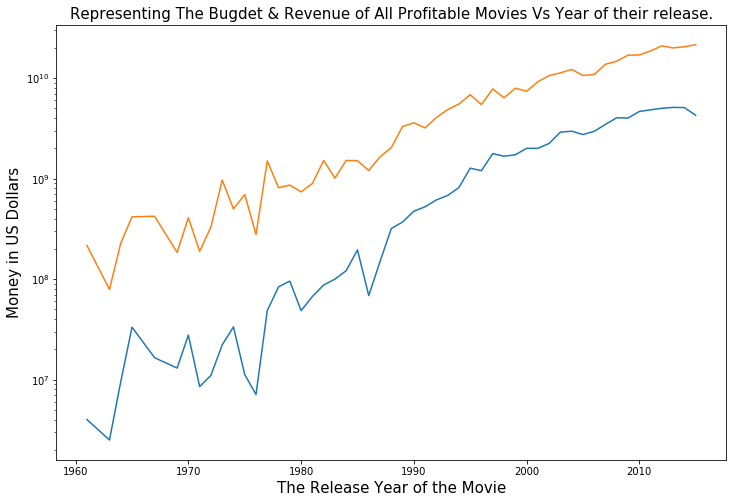

In [29]:
# we could see how the budget and revenue of the most profitable movies changed over the years using graphs
# first we will create a DataFrame for the budget and revenue
budget = df_profitable.groupby('release_year')['budget'].sum()
budget_df = budget.to_frame()

# the same for revenue

revenue = df_profitable.groupby('release_year')['revenue'].sum()
revenue_df = revenue.to_frame()
B_R = pd.concat([budget_df, revenue_df], axis=1)

# Now creating our plot

plt.figure(figsize=(12,8))
plt.title("Representing The Bugdet & Revenue of All Profitable Movies Vs Year of their release.", fontsize = 15)
plt.xlabel("The Release Year of the Movie", fontsize = 15)
plt.ylabel("Money in US Dollars", fontsize = 15)
plt.xticks([1960,1970,1980,1990,2000,2010])
plt.yscale('log')
plt.plot(B_R)
plt.show();

We could see that over the years revenue has been increasing alongside the budget of the movies with few drops till 1990, after 1990 revenue and budget have been increasing in more stable way. this could be the result of many factor like inflation or changes in the movie industry.

> ### 7- The most frequent actor in a leading role of all movies ?

In [30]:
# we will take a copy of the cast column from our original dataset 
# then we drop all the null values "rows with no cast described"
# finally we could have all the lead actors but we could take a look for our top10 for now

lead_actor = df['cast'].copy()
lead_actor.dropna(inplace=True)
lead_actor = lead_actor.apply(lambda x: x.split('|')[0])
top10 = lead_actor.value_counts().head(10)
top10

Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Robert De Niro           28
Denzel Washington        28
Tom Hanks                28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Name: cast, dtype: int64

> ### 8- The most frequent actor in a leading role in a profitable movie ( more than the mean profit) ?

In [31]:
# we could use a DataFrame we used before to get movies above the profit average "df_profitable"
lead_profitable = df_profitable['cast'].copy()
lead_profitable.dropna(inplace=True)
lead_profitable = lead_profitable.apply(lambda x: x.split('|')[0])
top10_profitable = lead_profitable.value_counts().head(10)
top10_profitable

Tom Cruise               24
Tom Hanks                18
Adam Sandler             17
Sylvester Stallone       17
Jim Carrey               14
Bruce Willis             13
Ben Stiller              13
Will Smith               12
Arnold Schwarzenegger    12
Johnny Depp              12
Name: cast, dtype: int64

 > ### 9- Which genres are more profitable ?

In [32]:
# we will use "df_profitable" DataFrame
# and we will take a copy of the genres column to get our output

genres = df_profitable['genres'].copy()
genres.dropna(inplace=True)
genres = genres.apply(lambda x: x.split('|'))
genres = genres.explode()
genres = genres.value_counts()
genres

Comedy             386
Action             385
Drama              368
Adventure          321
Thriller           312
Family             189
Romance            179
Science Fiction    177
Fantasy            166
Crime              146
Animation          107
Horror              91
Mystery             88
Music               42
War                 39
History             26
Western             13
Documentary          3
Name: genres, dtype: int64

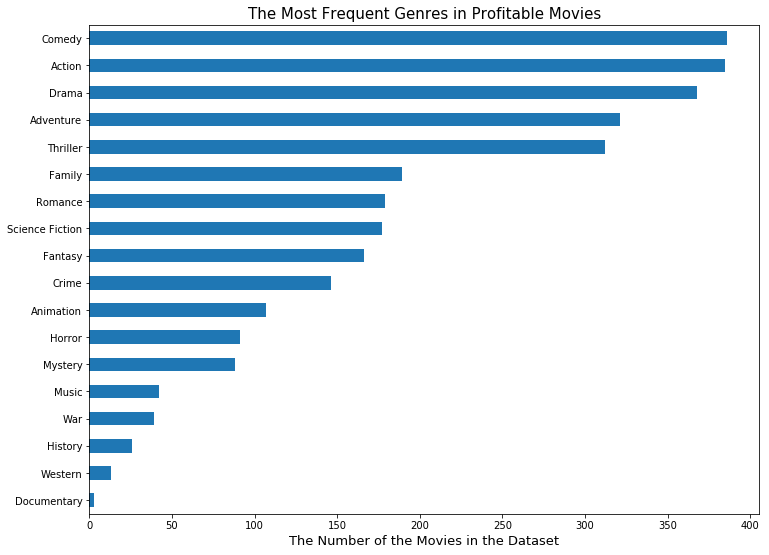

In [33]:
# one final thing we could plot our genres to make good useof the numbers
genres.sort_values(ascending = True, inplace = True)
genres_plot = genres.plot.barh()
genres_plot.set(title = "The Most Frequent Genres in Profitable Movies")
genres_plot.title.set_fontsize(15)
genres_plot.set_xlabel("The Number of the Movies in the Dataset", fontsize= 13)
genres_plot.figure.set_size_inches(12, 9)

<a id='conclusions'></a>
## Conclusions

> Finally, we could get a lot of outcomes and conclusions and a lot of questions to ask and we could possibly answer but so far we came out with some useful facts and conclusions that could be useful when making a movie and we would like to increase the probability of a movie to become a hit such as : <br> <br>
> **1 -** We could take a look of all the characteristics of most profitable movie for each year <br> 
> **2 -** The average budget of a profitable movie could be around 66 million <br> 
> **3 -** if you want to increase the probability of a movie to become a hit,  One of these leading actors should be in the cast : Tom Cruise,Tom Hanks,Sylvester Stallone,Adam Sandler,Jim Carrey <br> 
> **4 -** The most common genres are : Comedy, Action, Drama, Adventure<br>


> **Limitations:** This analysis was done considering "the profitable movies" as the movies which had a profit of around 70 million dollar. Also we're not sure if the data we used is completely true, accurate and up_to_date or the missing values we cleaned before could significantly affect our analysis. More and more factors that could be misleading and state the whole analysis as wrong. even so we managed to get a good understanding of our dataset.